<a href="https://colab.research.google.com/github/Rhea-02/ISA_task_phase-Nidhi-V-Ranjith-/blob/main/neural_networks_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)




#Data


In [34]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [35]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#visualise example

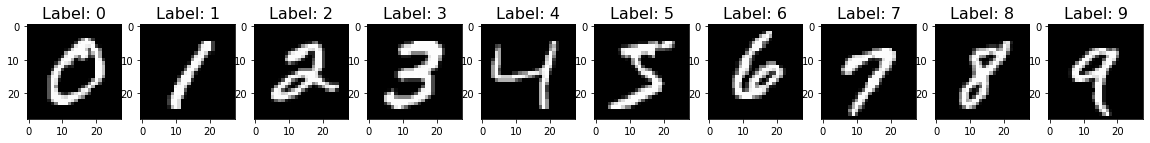

In [36]:
num_classes=10
f, ax=plt.subplots(1,num_classes,figsize=(20,20))

for i in range (0,num_classes):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i),fontsize=16)



In [37]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [38]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [39]:
for i in range (10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Preparing Data


In [40]:
#normalize data
x_train=x_train/255.0
x_test=x_test/255.0

In [41]:
#reshape data
x_train=x_train.reshape(x_train.shape[0], -1)
x_test=x_test.reshape(x_test.shape[0], -1 )
print(x_train.shape)


(60000, 784)


In [42]:
#creating model for neural network

model = Sequential()

model.add(Dense(units=128,input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
batch_size =512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size,epochs=epochs)


Epoch 1/10
118/118 [==============================] - 2s 9ms/step - loss: 0.5780 - accuracy: 0.8314
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.2267 - accuracy: 0.9336
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1642 - accuracy: 0.9525
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1285 - accuracy: 0.9623
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1052 - accuracy: 0.9688
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0890 - accuracy: 0.9739
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0754 - accuracy: 0.9777
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0575 - accuracy: 0.9829
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0526 - accuracy: 0.9841

#Evaluate

In [47]:


score=model.evaluate(x_test,y_test)
print()
print("Test loss", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9758

Test loss 0.9757999777793884


In [46]:
score=model.evaluate(x_test,y_test)
print()
print('Test accuracy:' , score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.0759 - accuracy: 0.9758

Test accuracy: 0.9757999777793884


In [49]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred, axis=1)
print(y_pred)

print(y_pred_classes)

[[5.6147296e-06 2.8100180e-06 2.3649121e-04 ... 9.9928147e-01
  2.2995157e-05 9.6436197e-06]
 [1.9338982e-09 4.8058359e-03 9.9512547e-01 ... 1.5469171e-08
  3.2057026e-06 5.4387460e-11]
 [9.5658731e-07 9.9761862e-01 2.7111772e-04 ... 1.2313758e-03
  4.3791544e-04 3.9198053e-06]
 ...
 [1.6491620e-09 3.0953082e-08 1.8914385e-08 ... 9.1925352e-07
  4.6077139e-06 8.4987269e-06]
 [2.7838933e-08 4.4283478e-08 1.1749081e-10 ... 3.2646597e-09
  2.5153826e-05 2.7739894e-10]
 [1.8395186e-09 1.1232045e-12 5.3577276e-10 ... 2.3594098e-12
  3.8536421e-10 5.7938632e-12]]
[7 2 1 ... 4 5 6]


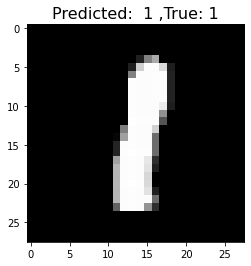

In [52]:
#one example
random_idx=np.random.choice(len(x_test))
x_sample=x_test[random_idx]
y_true=np.argmax(y_test, axis=1)
y_sample_true=y_true[random_idx]
y_sample_pred_class=y_pred_classes[random_idx]

plt.title("Predicted:  {} ,True: {}".format(y_sample_pred_class,y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

Confusion Matrix


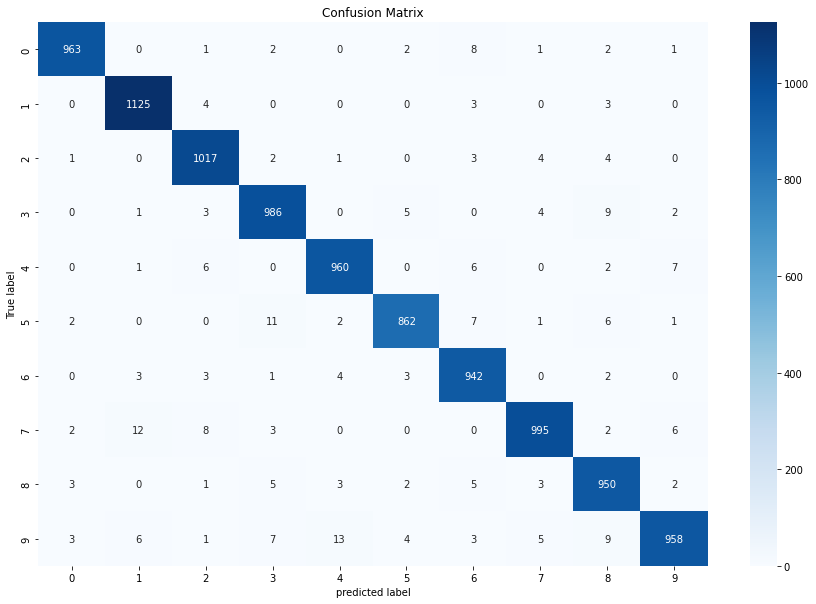

In [53]:
#confusion matrix-to test accuracy for every class

confusion_mtx=confusion_matrix(y_true, y_pred_classes)
#Plotting
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtx,annot=True, fmt='d', ax=ax ,cmap="Blues")
ax.set_xlabel('predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix');